In [1]:
import numpy as np
import matplotlib.pyplot as plt

Task 2.1 - Estimating pi

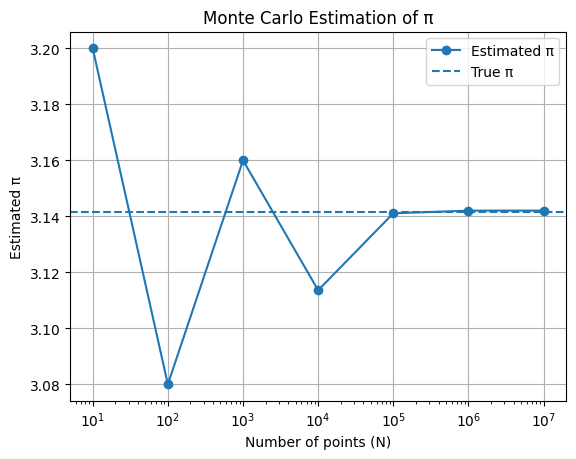

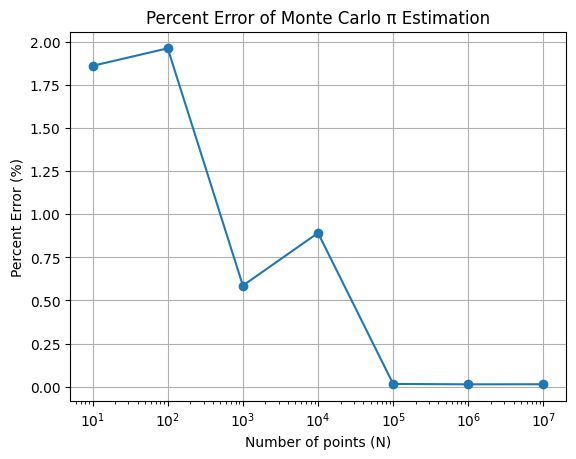

In [5]:
def estimate_pi(N: int) -> float:
    x_coords = np.random.uniform(-1,1, size = N)
    y_coords = np.random.uniform(-1,1, size = N)
    dist = x_coords ** 2 + y_coords ** 2
    outside = dist > 1
    count = np.sum(outside)
    return 4*(N-count)/N

N_values = np.logspace(1, 7, num=7)
N_values = N_values.astype(int)
estimates = []
for value in N_values:
    est = estimate_pi(value)
    estimates.append(est)

estimates = np.array(estimates)
act = np.pi
percent_error = np.abs(estimates - act) / act * 100

plt.figure()
plt.plot(N_values, estimates, marker='o', label='Estimated π')
plt.axhline(y=np.pi, linestyle='--', label='True π')

plt.xscale('log')
plt.xlabel('Number of points (N)')
plt.ylabel('Estimated π')
plt.title('Monte Carlo Estimation of π')
plt.legend()
plt.grid(True)

plt.show()

plt.figure()
plt.plot(N_values, percent_error, marker='o')

plt.xscale('log')
plt.xlabel('Number of points (N)')
plt.ylabel('Percent Error (%)')
plt.title('Percent Error of Monte Carlo π Estimation')
plt.grid(True)

plt.show()


Task 2.2 - Estimating e

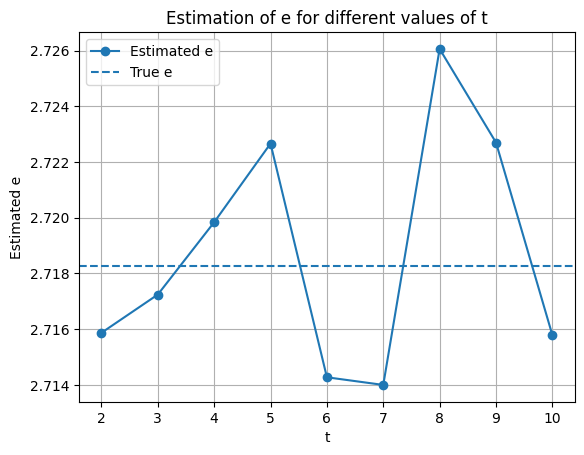

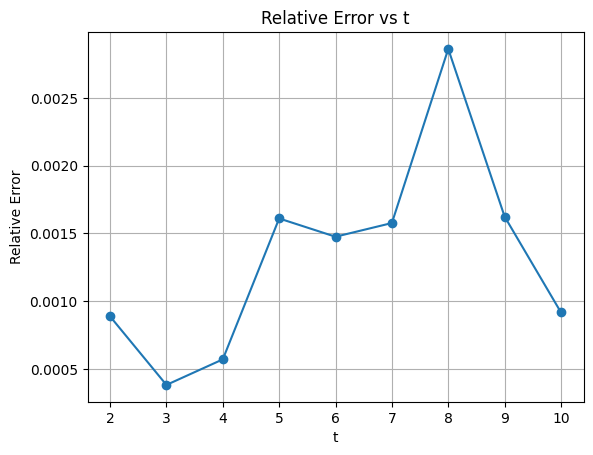

In [11]:
def estimate_e(t: float, N: int) -> float:
    x = np.random.uniform(1, t, size=N)
    y = np.random.uniform(0, 1, size=N)
    inside = y < (1 / x)
    area = (np.sum(inside) / N) * (t - 1)
    return t ** (1 / area)

N = 1000000
t_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])

e_estimates = []
for t in t_values:
    e_estimates.append(estimate_e(t, N))

e_estimates = np.array(e_estimates)

e_true = np.e
relative_error = np.abs(e_estimates - e_true) / e_true

plt.figure()
plt.plot(t_values, e_estimates, marker='o', label='Estimated e')
plt.axhline(y=e_true, linestyle='--', label='True e')
plt.xlabel('t')
plt.ylabel('Estimated e')
plt.title('Estimation of e for different values of t')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t_values, relative_error, marker='o')
plt.xlabel('t')
plt.ylabel('Relative Error')
plt.title('Relative Error vs t')
plt.grid(True)
plt.show()


Task 2.3 - Modular function

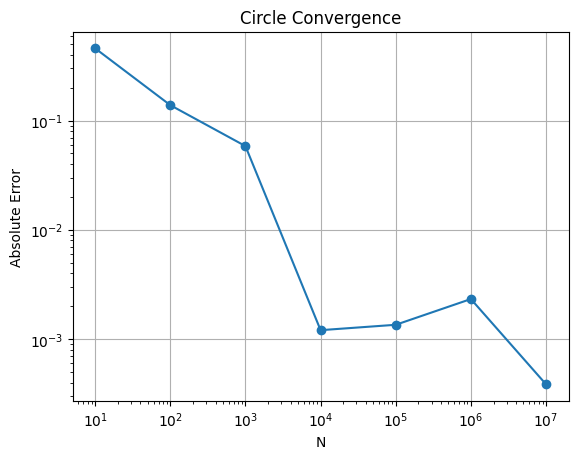

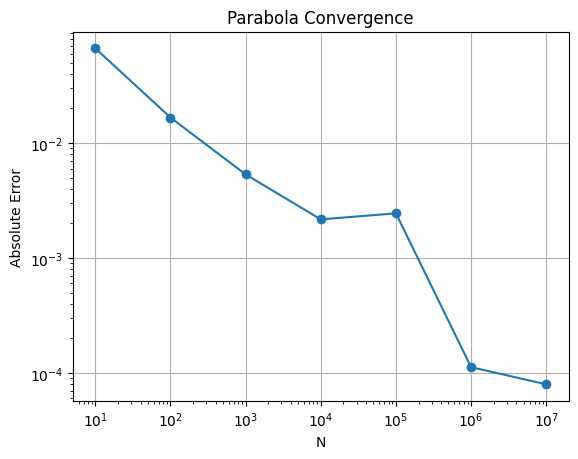

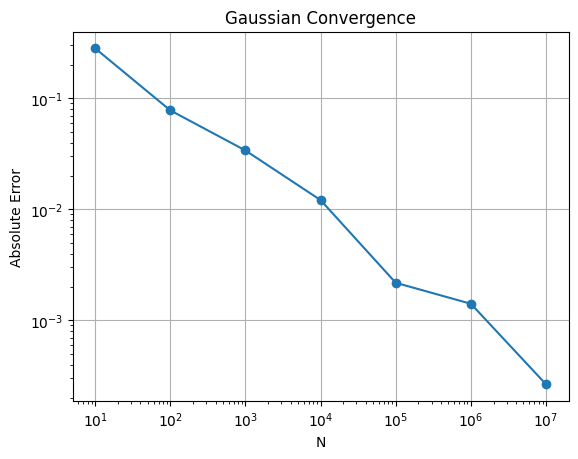

In [16]:
def run_simulation(predicate_fn, bounds, N):
    xmin, xmax, ymin, ymax = bounds
    x_coords = np.random.uniform(xmin, xmax, N)
    y_coords = np.random.uniform(ymin, ymax, N)

    inside = predicate_fn(x_coords, y_coords)
    return (xmax - xmin)*(ymax - ymin)*np.sum(inside) / N

def is_in_circle(x, y):
    return (x**2 + y**2) <= 1

def under_parabola(x, y):
    return y <= x**2

def under_gaussian(x, y):
    return y <= np.exp(-x**2)

N_values = np.logspace(1, 7, num=7).astype(int)
circle_est = []
parabola_est = []
gaussian_est = []
for N in N_values:
    circle_est.append(run_simulation(is_in_circle, [-1, 1, -1, 1], N))
    parabola_est.append(run_simulation(under_parabola, [0, 1, 0, 1], N))
    gaussian_est.append(run_simulation(under_gaussian, [0, 2, 0, 1], N))

circle_est = np.array(circle_est)
parabola_est = np.array(parabola_est)
gaussian_est = np.array(gaussian_est)
circle_true = np.pi
parabola_true = 1 / 3
x_dense = np.linspace(0, 2, 1000000)
gaussian_true = np.trapezoid(np.exp(-x_dense**2), x_dense)

circle_err = np.abs(circle_est - circle_true)
parabola_err = np.abs(parabola_est - parabola_true)
gaussian_err = np.abs(gaussian_est - gaussian_true)

plt.figure()
plt.plot(N_values, circle_err, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Circle Convergence')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(N_values, parabola_err, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Parabola Convergence')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(N_values, gaussian_err, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Gaussian Convergence')
plt.grid(True)
plt.show()